# Exercícios Análise de Regressão

-----

## Modelos com variáveis categóricas e com respostas binárias

-----

In [105]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings

# Ignore FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1 - Modelos de Regressão com Variáveis Categóricas

### I - Crie um conjunto de dados com duas variáveis independentes: uma contínua (X) e uma categórica (Z com duas categorias, por exemplo, "A" e "B").

In [106]:
df = pd.read_csv('salario_experiencia_sexo.csv',sep=';',decimal=',')

print(df)

    Salario  Experiencia Sexo
0      4100          2.6    M
1      7700          6.2    M
2      7100          5.6    M
3      2700          1.2    M
4      7900          6.4    M
5      2300          0.8    M
6      5500          4.0    M
7      4900          3.4    M
8     11400          9.9    M
9      9000          7.5    M
10     2516          1.6    F
11     6468          6.8    F
12     2288          1.3    F
13     3352          2.7    F
14     7760          8.5    F
15     7760          8.5    F
16     2744          1.9    F
17     1528          0.3    F
18     3960          3.5    F
19     3276          2.6    F


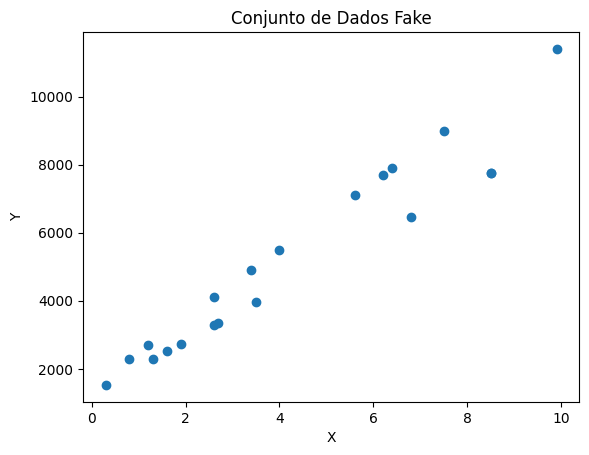

In [107]:
Y = df.Salario
X = df[[
    'Sexo','Experiencia'
]]
X = sm.add_constant(X)

# Plotando o conjunto de dados
plt.scatter(X.Experiencia, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Conjunto de Dados Fake')
plt.show()

### II - Ajuste um modelo de regressão linear para prever uma variável dependente (Y) com base em X e Z.

In [108]:

data = df
data['Sexo'] = (data["Sexo"] == 'F').astype(int)
data_homens = data[data['Sexo'] == 0]
data_mulheres = data[data['Sexo'] == 1]


X_homens = data_homens[['Experiencia']]
X_homens = sm.add_constant(X_homens)
Y_homens = data_homens['Salario']

model_homens = sm.OLS(Y_homens, X_homens).fit()


X_mulheres = data_mulheres[['Experiencia']]
X_mulheres = sm.add_constant(X_mulheres)
Y_mulheres = data_mulheres['Salario']

model_mulheres = sm.OLS(Y_mulheres, X_mulheres).fit()


X_combined = data[['Experiencia', 'Sexo']]
X_combined = sm.add_constant(X_combined)
Y_combined = data['Salario']

model_combined = sm.OLS(Y_combined, X_combined).fit()



In [109]:
# Exiba os resumos dos modelos
print("Resumo do Modelo para Homens:")
print(model_homens.summary())

Resumo do Modelo para Homens:
                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.609e+32
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          1.67e-126
Time:                        16:04:14   Log-Likelihood:                 267.06
No. Observations:                  10   AIC:                            -530.1
Df Residuals:                       8   BIC:                            -529.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1500.00

c:\GitHub\CEDS-805\venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


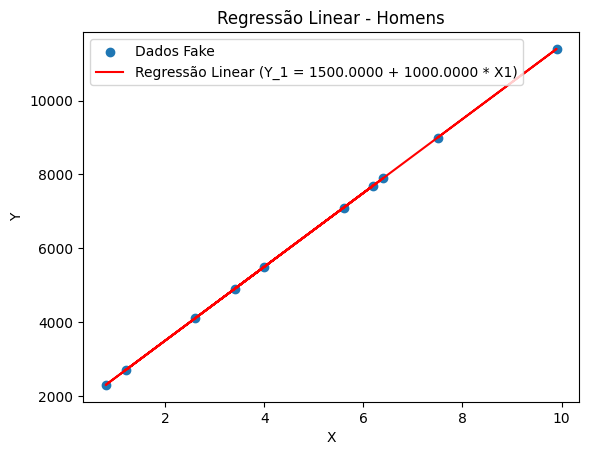

In [110]:
alfa_1 = model_homens.params[0]
beta_1 = model_homens.params[1]
Y_1 = alfa_1 + beta_1 * np.array(X_homens.Experiencia)
plt.scatter(np.array(X_homens.Experiencia), np.array(Y_homens), label='Dados Fake')
plt.plot(np.array(X_homens.Experiencia), np.array(Y_1), color='red', label=f'Regressão Linear (Y_1 = {alfa_1:.4f} + {beta_1:.4f} * X1)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Regressão Linear - Homens')
plt.show()

In [111]:
print("Resumo do Modelo para Mulheres:")
print(model_mulheres.summary())

Resumo do Modelo para Mulheres:
                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.745e+31
Date:                Sun, 22 Oct 2023   Prob (F-statistic):          1.24e-125
Time:                        16:04:15   Log-Likelihood:                 266.79
No. Observations:                  10   AIC:                            -529.6
Df Residuals:                       8   BIC:                            -529.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1300.

c:\GitHub\CEDS-805\venv\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


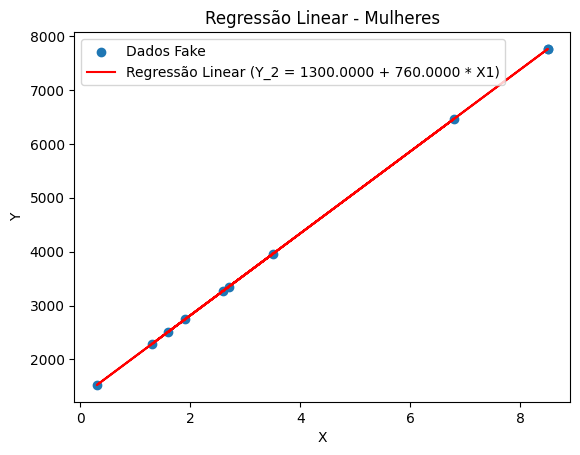

In [112]:
alfa_2 = model_mulheres.params[0]
beta_2 = model_mulheres.params[1]
Y_2 = alfa_2 + beta_2 * np.array(X_mulheres.Experiencia)
plt.scatter(np.array(X_mulheres.Experiencia), np.array(Y_mulheres), label='Dados Fake')
plt.plot(np.array(X_mulheres.Experiencia), np.array(Y_2), color='red', label=f'Regressão Linear (Y_2 = {alfa_2:.4f} + {beta_2:.4f} * X1)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Regressão Linear - Mulheres')
plt.show()

### Escrevendo Y em funcao de Y1 e Y2

In [113]:
Y_est = alfa_1 + (alfa_2 - alfa_1)* np.array(data.Sexo) + (beta_1 + (beta_2 - beta_1)* np.array(data.Sexo)) * np.array(X.Experiencia)
print(f'Y = {alfa_1:.2f} + {(alfa_2 - alfa_1):.2f} * Feminino + ({beta_1:.2f} + {(beta_2 - beta_1):.2f} * Feminino) * Experiencia')

Y = 1500.00 + -200.00 * Feminino + (1000.00 + -240.00 * Feminino) * Experiencia


In [114]:
print(Y_est - data.Salario)

0     0.000000e+00
1     0.000000e+00
2     0.000000e+00
3    -4.547474e-13
4     0.000000e+00
5    -4.547474e-13
6     0.000000e+00
7     0.000000e+00
8     1.818989e-12
9     0.000000e+00
10   -9.094947e-13
11    0.000000e+00
12   -9.094947e-13
13   -4.547474e-13
14    0.000000e+00
15    0.000000e+00
16   -9.094947e-13
17   -9.094947e-13
18   -4.547474e-13
19   -4.547474e-13
Name: Salario, dtype: float64


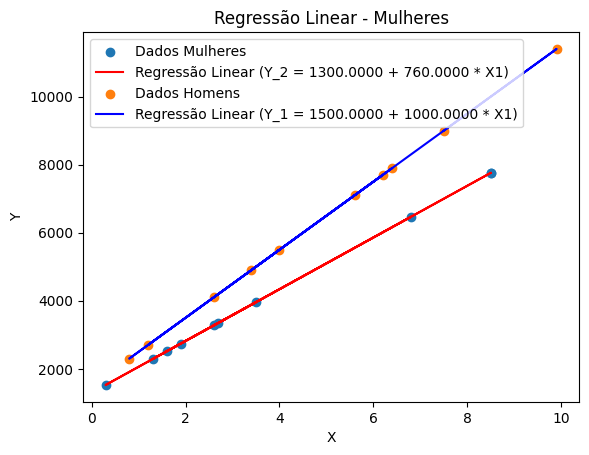

In [115]:
plt.scatter(np.array(X_mulheres.Experiencia), np.array(Y_mulheres), label='Dados Mulheres')
plt.plot(np.array(X_mulheres.Experiencia), np.array(Y_2), color='red', label=f'Regressão Linear (Y_2 = {alfa_2:.4f} + {beta_2:.4f} * X1)')
plt.scatter(np.array(X_homens.Experiencia), np.array(Y_homens), label='Dados Homens')
plt.plot(np.array(X_homens.Experiencia), np.array(Y_1), color='blue', label=f'Regressão Linear (Y_1 = {alfa_1:.4f} + {beta_1:.4f} * X1)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Regressão Linear - Mulheres')
plt.show()

### IV - Simule um conjunto de dados hipotético com variáveis categóricas e refaça os exercícios de I a III

### Nao entendi

----

## 2 - Modelos de Regressão Logística (Variáveis Binárias)

### I - Use um conjunto de dados com uma variável independente X e uma variável dependente binária (Y com dois níveis, por exemplo, "Sim" e "Não").

In [128]:
df = pd.read_csv('notas_alunos.csv',sep=';',decimal=',')
df['Aprovado'] = (df["Aprovado"] == 'Sim').astype(int)
Y = df.Aprovado
X = df[[
    'Nota'
]]
# X = sm.add_constant(X) # Retirado porque gerou matriz singular

### II - Ajuste um modelo de regressão logística para prever a probabilidade da resposta "Sim" com base em X.

In [129]:
modelo = sm.Logit(Y, X).fit(maxiter=100)
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.601698
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Aprovado   No. Observations:                  120
Model:                          Logit   Df Residuals:                      119
Method:                           MLE   Df Model:                            0
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                  0.1319
Time:                        16:12:45   Log-Likelihood:                -72.204
converged:                       True   LL-Null:                       -83.178
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Nota           0.0152      0.004      4.316      0.000       0.008       0.022


Predições
P(Y=1) = 1 / (1 + exp(-(0.0152 * Nota)))
0      0.783531
1      0.736298
2      0.785866
3      0.734909
4      0.743777
         ...   
115    0.670671
116    0.608579
117    0.672915
118    0.516283
119    0.528445
Length: 120, dtype: float64


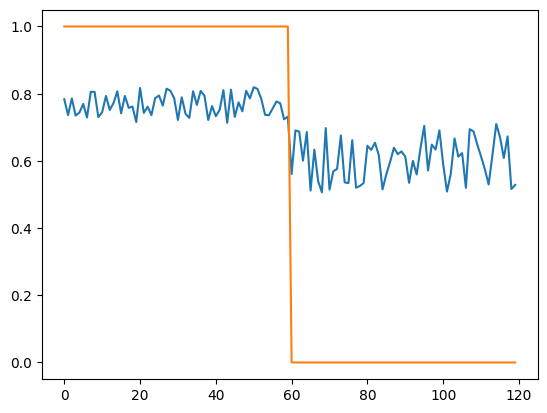

In [136]:
print("Predições")
print('P(Y=1) = 1 / (1 + exp(-(0.0152 * Nota)))')
print(modelo.predict(X))
plt.plot(modelo.predict(X))
plt.plot(Y)
plt.show()

### III - Avalie o ajuste do modelo e interprete os coeficientes em termos das chances (odds) da resposta "Sim" em relação a X.

Coeficiente para a variável 'Nota', é aproximadamente 0,0152.

Erro Padrão associado ao coeficiente da 'Nota' é aproximadamente 0,004.

Escore Z para o coeficiente da 'Nota' é aproximadamente 4,316.

O valor-p associado ao coeficiente da 'Nota' é zero (0,000).


Para interpretar os coeficientes em termos das chances da resposta 'Aprovado' ser "Sim" em relação à variável 'Nota', você pode usar a fórmula da regressão logística:

exp(0.0152) = 1,0153


### IV - Simule um conjunto de dados hipotético com variáveis binárias e refaça os exercícios de I a III

### (Nao entendi)